# [ Santander Customer Satisfaction ]
---
![image](https://user-images.githubusercontent.com/29038531/105580637-e3b80200-5dd0-11eb-875e-a9401ee974a8.png)

---
## Info. Summary 
* **evaluedate = ROC-AUC**
* **Santander Customer Satisfaction에서는 고객 정보등의 민감사항으로인해 values(변수)가 변수에 대한 정보를 얻을수 없음**

In [1]:
# =================================================== [ setting ] =====================================================
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import os 
os.chdir("/Users/gimjiseong/PycharmProjects/BOOK/파이썬머신러닝 완벽 가이드")

train_df = pd.read_csv("./data/Santander_Customer_Satisfaction/train.csv")
test_df = pd.read_csv("./data/Santander_Customer_Satisfaction/test.csv")
submission = pd.read_csv("./data/Santander_Customer_Satisfaction/sample_submission.csv")


Bad key "text.kerning_factor" on line 4 in
/Users/gimjiseong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
## + [ check Dataset info. ] ================
train_df.info()
print("dataset shape : ", train_df.shape) # dataset shape : 76020, 317
print("NA value : ", train_df.shape[0] - train_df.dropna().shape[0]) # NA값 없음 
train_df["TARGET"].value_counts() # values 0 : 73012, 1 : 3008
train_df.describe() # outlier = var3 min : -999999 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
dataset shape :  (76020, 371)
NA value :  0


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [3]:
print("median : ", np.median(train_df[train_df["var3"] > -999999]["var3"]))
print(train_df[train_df["var3"] > -999999]["var3"].describe()) 
# median : 2, 3분위수 까지의 값 : 2 mean : 2.7 으로 평균값은 max값(max : 238)에 의해 변향되었다고 볼수 있음 따라서 중위수를 대표값으로 대처

median :  2.0
count    75904.000000
mean         2.717577
std          9.455147
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        238.000000
Name: var3, dtype: float64


In [4]:
train_df["var3"] = train_df["var3"].replace(-999999, np.median(train_df["var3"]))
train_df.drop("ID", axis = 1, inplace = True)
X_features = train_df.iloc[:, :-1]
y_labels = train_df.iloc[:, -1]

In [6]:
# ============================================= [ baseline modeling ] ============================================
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, stratify = y_labels, random_state = 2109)
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 2109)
xgb_clf.fit(X_train, 
            y_train,
            early_stopping_rounds = 100, 
            eval_metric = "auc",
            eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = "macro")
print("ROC AUC: {0:.4f}".format(xgb_roc_score)) # ROC-AUC : 0.8344


[0]	validation_0-auc:0.805055	validation_1-auc:0.795249
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.808406	validation_1-auc:0.799643
[2]	validation_0-auc:0.811301	validation_1-auc:0.804536
[3]	validation_0-auc:0.81515	validation_1-auc:0.808646
[4]	validation_0-auc:0.820512	validation_1-auc:0.811704
[5]	validation_0-auc:0.821299	validation_1-auc:0.810894
[6]	validation_0-auc:0.821835	validation_1-auc:0.811376
[7]	validation_0-auc:0.823007	validation_1-auc:0.812739
[8]	validation_0-auc:0.822526	validation_1-auc:0.812293
[9]	validation_0-auc:0.822631	validation_1-auc:0.812305
[10]	validation_0-auc:0.82286	validation_1-auc:0.812034
[11]	validation_0-auc:0.823914	validation_1-auc:0.811832
[12]	validation_0-auc:0.823265	validation_1-auc:0.811154
[13]	validation_0-auc:0.823456	validation_1-auc:0.811273
[14]	validation_0-auc:0.824057	validation_1-auc:0.811635

[142]	validation_0-auc:0.863481	validation_1-auc:0.834331
[143]	validation_0-auc:0.863551	validation_1-auc:0.834363
[144]	validation_0-auc:0.863637	validation_1-auc:0.834324
[145]	validation_0-auc:0.863928	validation_1-auc:0.834264
[146]	validation_0-auc:0.864186	validation_1-auc:0.834215
[147]	validation_0-auc:0.864276	validation_1-auc:0.834166
[148]	validation_0-auc:0.86432	validation_1-auc:0.834305
[149]	validation_0-auc:0.864451	validation_1-auc:0.834252
[150]	validation_0-auc:0.864622	validation_1-auc:0.834249
[151]	validation_0-auc:0.86465	validation_1-auc:0.834324
[152]	validation_0-auc:0.864744	validation_1-auc:0.834252
[153]	validation_0-auc:0.864835	validation_1-auc:0.834236
[154]	validation_0-auc:0.864863	validation_1-auc:0.834223
[155]	validation_0-auc:0.864925	validation_1-auc:0.834218
[156]	validation_0-auc:0.865147	validation_1-auc:0.834122
[157]	validation_0-auc:0.865302	validation_1-auc:0.83408
[158]	validation_0-auc:0.865509	validation_1-auc:0.833908
[159]	validation_

In [7]:
## + [ optimization parameters ] ============
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100, random_state = 2109)
params = {"max_depth": [5, 7],
          "min_child_weight" : [1, 3],
          "colsample_bytree" : [0.5, 0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid = params, cv = 3)
gridcv.fit(X_train,
           y_train,
           early_stopping_rounds = 30, 
           eval_metric = "auc",
           eval_set = [(X_train, y_train), (X_test, y_test)])

print("Best params GridSearchCV : ", gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = "macro")
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.71552	validation_1-auc:0.696613
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.811347	validation_1-auc:0.797012
[2]	validation_0-auc:0.814708	validation_1-auc:0.801606
[3]	validation_0-auc:0.823371	validation_1-auc:0.809339
[4]	validation_0-auc:0.827925	validation_1-auc:0.814994
[5]	validation_0-auc:0.83103	validation_1-auc:0.817191
[6]	validation_0-auc:0.827211	validation_1-auc:0.811459
[7]	validation_0-auc:0.834278	validation_1-auc:0.819337
[8]	validation_0-auc:0.836368	validation_1-auc:0.821461
[9]	validation_0-auc:0.835523	validation_1-auc:0.815453
[10]	validation_0-auc:0.837685	validation_1-auc:0.818771
[11]	validation_0-auc:0.838321	validation_1-auc:0.819608
[12]	validation_0-auc:0.840382	validation_1-auc:0.821768
[13]	validation_0-auc:0.839892	validation_1-auc:0.821595
[14]	validation_0-auc:0.842431	validation_1-auc:0.825063


[59]	validation_0-auc:0.867275	validation_1-auc:0.830831
[60]	validation_0-auc:0.86745	validation_1-auc:0.830764
[61]	validation_0-auc:0.867952	validation_1-auc:0.831336
[62]	validation_0-auc:0.868228	validation_1-auc:0.831368
[63]	validation_0-auc:0.868558	validation_1-auc:0.831092
[64]	validation_0-auc:0.868701	validation_1-auc:0.831324
[65]	validation_0-auc:0.869096	validation_1-auc:0.831246
[66]	validation_0-auc:0.869282	validation_1-auc:0.830995
[67]	validation_0-auc:0.869575	validation_1-auc:0.831194
[68]	validation_0-auc:0.869747	validation_1-auc:0.831237
[69]	validation_0-auc:0.870106	validation_1-auc:0.831321
[70]	validation_0-auc:0.870341	validation_1-auc:0.830748
[71]	validation_0-auc:0.870519	validation_1-auc:0.830476
[72]	validation_0-auc:0.870916	validation_1-auc:0.830942
[73]	validation_0-auc:0.870954	validation_1-auc:0.830984
[74]	validation_0-auc:0.871359	validation_1-auc:0.831473
[75]	validation_0-auc:0.871419	validation_1-auc:0.831117
[76]	validation_0-auc:0.871692	v

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.808018	validation_1-auc:0.793972
[2]	validation_0-auc:0.814793	validation_1-auc:0.804689
[3]	validation_0-auc:0.824016	validation_1-auc:0.811838
[4]	validation_0-auc:0.829142	validation_1-auc:0.817121
[5]	validation_0-auc:0.832219	validation_1-auc:0.818712
[6]	validation_0-auc:0.828682	validation_1-auc:0.81232
[7]	validation_0-auc:0.833862	validation_1-auc:0.819207
[8]	validation_0-auc:0.836965	validation_1-auc:0.821747
[9]	validation_0-auc:0.835742	validation_1-auc:0.816287
[10]	validation_0-auc:0.83775	validation_1-auc:0.81913
[11]	validation_0-auc:0.838859	validation_1-auc:0.819458
[12]	validation_0-auc:0.840672	validation_1-auc:0.822928
[13]	validation_0-auc:0.840495	validation_1-auc:0.822101
[14]	validation_0-auc:0.84295	validation_1-auc:0.824813
[15]	validation_0-auc:0.844144	validation_1-auc:0.825731
[

[54]	validation_0-auc:0.863404	validation_1-auc:0.828904
[55]	validation_0-auc:0.863565	validation_1-auc:0.829131
[56]	validation_0-auc:0.864074	validation_1-auc:0.828741
[57]	validation_0-auc:0.86435	validation_1-auc:0.829027
[58]	validation_0-auc:0.864558	validation_1-auc:0.828676
[59]	validation_0-auc:0.864804	validation_1-auc:0.828641
[60]	validation_0-auc:0.864935	validation_1-auc:0.828602
[61]	validation_0-auc:0.865514	validation_1-auc:0.828875
[62]	validation_0-auc:0.865639	validation_1-auc:0.829041
[63]	validation_0-auc:0.865755	validation_1-auc:0.829201
[64]	validation_0-auc:0.86596	validation_1-auc:0.829021
[65]	validation_0-auc:0.866134	validation_1-auc:0.829122
[66]	validation_0-auc:0.86627	validation_1-auc:0.828953
[67]	validation_0-auc:0.866492	validation_1-auc:0.829098
[68]	validation_0-auc:0.866639	validation_1-auc:0.829122
[69]	validation_0-auc:0.866795	validation_1-auc:0.828907
[70]	validation_0-auc:0.867187	validation_1-auc:0.828387
[71]	validation_0-auc:0.867258	val

[13]	validation_0-auc:0.853616	validation_1-auc:0.824856
[14]	validation_0-auc:0.856097	validation_1-auc:0.827392
[15]	validation_0-auc:0.857617	validation_1-auc:0.828233
[16]	validation_0-auc:0.85675	validation_1-auc:0.825933
[17]	validation_0-auc:0.856261	validation_1-auc:0.822263
[18]	validation_0-auc:0.85818	validation_1-auc:0.82395
[19]	validation_0-auc:0.857595	validation_1-auc:0.822818
[20]	validation_0-auc:0.857495	validation_1-auc:0.821212
[21]	validation_0-auc:0.859913	validation_1-auc:0.822605
[22]	validation_0-auc:0.861939	validation_1-auc:0.824171
[23]	validation_0-auc:0.864099	validation_1-auc:0.825108
[24]	validation_0-auc:0.864854	validation_1-auc:0.825364
[25]	validation_0-auc:0.864565	validation_1-auc:0.82387
[26]	validation_0-auc:0.86544	validation_1-auc:0.825313
[27]	validation_0-auc:0.866719	validation_1-auc:0.825864
[28]	validation_0-auc:0.868764	validation_1-auc:0.827544
[29]	validation_0-auc:0.869182	validation_1-auc:0.826333
[30]	validation_0-auc:0.869099	valid

[61]	validation_0-auc:0.889312	validation_1-auc:0.826813
[62]	validation_0-auc:0.889496	validation_1-auc:0.826986
[63]	validation_0-auc:0.889554	validation_1-auc:0.826733
[64]	validation_0-auc:0.889618	validation_1-auc:0.826399
[65]	validation_0-auc:0.889713	validation_1-auc:0.826317
[66]	validation_0-auc:0.88976	validation_1-auc:0.826046
[67]	validation_0-auc:0.890008	validation_1-auc:0.826484
[68]	validation_0-auc:0.890181	validation_1-auc:0.826525
[69]	validation_0-auc:0.890249	validation_1-auc:0.826241
[70]	validation_0-auc:0.890528	validation_1-auc:0.826148
[71]	validation_0-auc:0.890565	validation_1-auc:0.825939
[72]	validation_0-auc:0.89117	validation_1-auc:0.826249
[73]	validation_0-auc:0.891208	validation_1-auc:0.826186
[74]	validation_0-auc:0.891639	validation_1-auc:0.826359
[75]	validation_0-auc:0.891681	validation_1-auc:0.826235
[76]	validation_0-auc:0.891959	validation_1-auc:0.826591
[77]	validation_0-auc:0.892464	validation_1-auc:0.826705
[78]	validation_0-auc:0.892511	va

[14]	validation_0-auc:0.854784	validation_1-auc:0.829376
[15]	validation_0-auc:0.856657	validation_1-auc:0.829997
[16]	validation_0-auc:0.855265	validation_1-auc:0.825874
[17]	validation_0-auc:0.854825	validation_1-auc:0.822821
[18]	validation_0-auc:0.856819	validation_1-auc:0.825397
[19]	validation_0-auc:0.855904	validation_1-auc:0.825028
[20]	validation_0-auc:0.855825	validation_1-auc:0.823493
[21]	validation_0-auc:0.858563	validation_1-auc:0.824587
[22]	validation_0-auc:0.86053	validation_1-auc:0.825898
[23]	validation_0-auc:0.862266	validation_1-auc:0.826495
[24]	validation_0-auc:0.862865	validation_1-auc:0.825544
[25]	validation_0-auc:0.862156	validation_1-auc:0.824076
[26]	validation_0-auc:0.86296	validation_1-auc:0.825429
[27]	validation_0-auc:0.864358	validation_1-auc:0.827059
[28]	validation_0-auc:0.866516	validation_1-auc:0.828922
[29]	validation_0-auc:0.866769	validation_1-auc:0.82685
[30]	validation_0-auc:0.866269	validation_1-auc:0.825926
[31]	validation_0-auc:0.867707	val

[76]	validation_0-auc:0.885171	validation_1-auc:0.828091
[77]	validation_0-auc:0.885547	validation_1-auc:0.828149
[78]	validation_0-auc:0.885709	validation_1-auc:0.827883
[79]	validation_0-auc:0.885921	validation_1-auc:0.82805
[80]	validation_0-auc:0.886063	validation_1-auc:0.827989
[81]	validation_0-auc:0.886388	validation_1-auc:0.828105
[82]	validation_0-auc:0.886687	validation_1-auc:0.828288
[83]	validation_0-auc:0.886729	validation_1-auc:0.82809
[84]	validation_0-auc:0.886846	validation_1-auc:0.828049
[85]	validation_0-auc:0.887103	validation_1-auc:0.828033
[86]	validation_0-auc:0.887084	validation_1-auc:0.827906
[87]	validation_0-auc:0.887245	validation_1-auc:0.828108
[88]	validation_0-auc:0.88773	validation_1-auc:0.828358
[89]	validation_0-auc:0.888028	validation_1-auc:0.828444
[90]	validation_0-auc:0.888431	validation_1-auc:0.828242
[91]	validation_0-auc:0.888485	validation_1-auc:0.827949
[92]	validation_0-auc:0.888559	validation_1-auc:0.828027
[93]	validation_0-auc:0.889093	val

[16]	validation_0-auc:0.842591	validation_1-auc:0.821578
[17]	validation_0-auc:0.84451	validation_1-auc:0.823316
[18]	validation_0-auc:0.845136	validation_1-auc:0.824705
[19]	validation_0-auc:0.846351	validation_1-auc:0.82405
[20]	validation_0-auc:0.847818	validation_1-auc:0.824495
[21]	validation_0-auc:0.849122	validation_1-auc:0.82501
[22]	validation_0-auc:0.849663	validation_1-auc:0.825356
[23]	validation_0-auc:0.851086	validation_1-auc:0.825506
[24]	validation_0-auc:0.851521	validation_1-auc:0.824499
[25]	validation_0-auc:0.852354	validation_1-auc:0.82537
[26]	validation_0-auc:0.853055	validation_1-auc:0.826038
[27]	validation_0-auc:0.853662	validation_1-auc:0.826811
[28]	validation_0-auc:0.85411	validation_1-auc:0.827269
[29]	validation_0-auc:0.854778	validation_1-auc:0.827623
[30]	validation_0-auc:0.855103	validation_1-auc:0.827317
[31]	validation_0-auc:0.855652	validation_1-auc:0.827895
[32]	validation_0-auc:0.856153	validation_1-auc:0.828467
[33]	validation_0-auc:0.8565	validat

[58]	validation_0-auc:0.868174	validation_1-auc:0.831728
[59]	validation_0-auc:0.86836	validation_1-auc:0.832057
[60]	validation_0-auc:0.868708	validation_1-auc:0.831924
[61]	validation_0-auc:0.869017	validation_1-auc:0.831947
[62]	validation_0-auc:0.869304	validation_1-auc:0.831975
[63]	validation_0-auc:0.869492	validation_1-auc:0.831935
[64]	validation_0-auc:0.869794	validation_1-auc:0.832173
[65]	validation_0-auc:0.870125	validation_1-auc:0.831959
[66]	validation_0-auc:0.870311	validation_1-auc:0.831855
[67]	validation_0-auc:0.870592	validation_1-auc:0.831851
[68]	validation_0-auc:0.870808	validation_1-auc:0.831792
[69]	validation_0-auc:0.871088	validation_1-auc:0.831763
[70]	validation_0-auc:0.871249	validation_1-auc:0.831516
[71]	validation_0-auc:0.871399	validation_1-auc:0.831788
[72]	validation_0-auc:0.871809	validation_1-auc:0.831839
[73]	validation_0-auc:0.872009	validation_1-auc:0.831968
[74]	validation_0-auc:0.872463	validation_1-auc:0.832129
[75]	validation_0-auc:0.87261	va

[22]	validation_0-auc:0.849312	validation_1-auc:0.826823
[23]	validation_0-auc:0.850233	validation_1-auc:0.826838
[24]	validation_0-auc:0.850166	validation_1-auc:0.825436
[25]	validation_0-auc:0.850508	validation_1-auc:0.825095
[26]	validation_0-auc:0.851536	validation_1-auc:0.825443
[27]	validation_0-auc:0.851963	validation_1-auc:0.826251
[28]	validation_0-auc:0.852654	validation_1-auc:0.826941
[29]	validation_0-auc:0.853351	validation_1-auc:0.827391
[30]	validation_0-auc:0.853901	validation_1-auc:0.828203
[31]	validation_0-auc:0.853948	validation_1-auc:0.828221
[32]	validation_0-auc:0.854338	validation_1-auc:0.828474
[33]	validation_0-auc:0.854728	validation_1-auc:0.828646
[34]	validation_0-auc:0.855031	validation_1-auc:0.828444
[35]	validation_0-auc:0.855727	validation_1-auc:0.829198
[36]	validation_0-auc:0.856358	validation_1-auc:0.829538
[37]	validation_0-auc:0.856897	validation_1-auc:0.829509
[38]	validation_0-auc:0.857741	validation_1-auc:0.830373
[39]	validation_0-auc:0.858161	

[67]	validation_0-auc:0.867842	validation_1-auc:0.832245
[68]	validation_0-auc:0.868023	validation_1-auc:0.832194
[69]	validation_0-auc:0.868386	validation_1-auc:0.832606
[70]	validation_0-auc:0.868555	validation_1-auc:0.832494
[71]	validation_0-auc:0.868904	validation_1-auc:0.832348
[72]	validation_0-auc:0.86899	validation_1-auc:0.832545
[73]	validation_0-auc:0.869108	validation_1-auc:0.832357
[74]	validation_0-auc:0.869363	validation_1-auc:0.832343
[75]	validation_0-auc:0.869507	validation_1-auc:0.8322
[76]	validation_0-auc:0.869664	validation_1-auc:0.832237
[77]	validation_0-auc:0.869687	validation_1-auc:0.832054
[78]	validation_0-auc:0.8699	validation_1-auc:0.831984
[79]	validation_0-auc:0.87006	validation_1-auc:0.831891
[80]	validation_0-auc:0.87015	validation_1-auc:0.831988
[81]	validation_0-auc:0.87023	validation_1-auc:0.831809
[82]	validation_0-auc:0.870307	validation_1-auc:0.831448
[83]	validation_0-auc:0.870608	validation_1-auc:0.831264
[84]	validation_0-auc:0.870635	validati

[5]	validation_0-auc:0.837545	validation_1-auc:0.817495
[6]	validation_0-auc:0.836608	validation_1-auc:0.815008
[7]	validation_0-auc:0.83955	validation_1-auc:0.818613
[8]	validation_0-auc:0.842221	validation_1-auc:0.821762
[9]	validation_0-auc:0.843003	validation_1-auc:0.817112
[10]	validation_0-auc:0.844236	validation_1-auc:0.817661
[11]	validation_0-auc:0.847118	validation_1-auc:0.820096
[12]	validation_0-auc:0.849357	validation_1-auc:0.822913
[13]	validation_0-auc:0.849683	validation_1-auc:0.819778
[14]	validation_0-auc:0.852604	validation_1-auc:0.822068
[15]	validation_0-auc:0.854285	validation_1-auc:0.82359
[16]	validation_0-auc:0.852873	validation_1-auc:0.822727
[17]	validation_0-auc:0.855102	validation_1-auc:0.824504
[18]	validation_0-auc:0.857448	validation_1-auc:0.826969
[19]	validation_0-auc:0.857974	validation_1-auc:0.825882
[20]	validation_0-auc:0.860826	validation_1-auc:0.826308
[21]	validation_0-auc:0.863341	validation_1-auc:0.826944
[22]	validation_0-auc:0.8644	validatio

[53]	validation_0-auc:0.888608	validation_1-auc:0.829318
[54]	validation_0-auc:0.889249	validation_1-auc:0.829098
[55]	validation_0-auc:0.889434	validation_1-auc:0.828899
[56]	validation_0-auc:0.889709	validation_1-auc:0.828747
[57]	validation_0-auc:0.889923	validation_1-auc:0.8285
[58]	validation_0-auc:0.890088	validation_1-auc:0.828225
[59]	validation_0-auc:0.890281	validation_1-auc:0.828234
[60]	validation_0-auc:0.890725	validation_1-auc:0.828273
[61]	validation_0-auc:0.89085	validation_1-auc:0.828228
[62]	validation_0-auc:0.891074	validation_1-auc:0.82777
[63]	validation_0-auc:0.891555	validation_1-auc:0.827887
[64]	validation_0-auc:0.891774	validation_1-auc:0.827772
[65]	validation_0-auc:0.892121	validation_1-auc:0.82729
[66]	validation_0-auc:0.892186	validation_1-auc:0.826921
[67]	validation_0-auc:0.892499	validation_1-auc:0.827071
[68]	validation_0-auc:0.892574	validation_1-auc:0.826988
[69]	validation_0-auc:0.892814	validation_1-auc:0.826688
[70]	validation_0-auc:0.892947	valid

[39]	validation_0-auc:0.875532	validation_1-auc:0.829425
[40]	validation_0-auc:0.876136	validation_1-auc:0.829373
[41]	validation_0-auc:0.876489	validation_1-auc:0.828524
[42]	validation_0-auc:0.877051	validation_1-auc:0.828571
[43]	validation_0-auc:0.87757	validation_1-auc:0.829339
[44]	validation_0-auc:0.877947	validation_1-auc:0.829329
[45]	validation_0-auc:0.878258	validation_1-auc:0.829816
[46]	validation_0-auc:0.878693	validation_1-auc:0.830165
[47]	validation_0-auc:0.879088	validation_1-auc:0.830262
[48]	validation_0-auc:0.879335	validation_1-auc:0.830485
[49]	validation_0-auc:0.87956	validation_1-auc:0.83056
[50]	validation_0-auc:0.879986	validation_1-auc:0.830286
[51]	validation_0-auc:0.880205	validation_1-auc:0.830158
[52]	validation_0-auc:0.880359	validation_1-auc:0.830215
Stopping. Best iteration:
[22]	validation_0-auc:0.861485	validation_1-auc:0.830792

[0]	validation_0-auc:0.737265	validation_1-auc:0.708886
Multiple eval metrics have been passed: 'validation_1-auc' will b

[41]	validation_0-auc:0.876652	validation_1-auc:0.831683
[42]	validation_0-auc:0.877324	validation_1-auc:0.8323
[43]	validation_0-auc:0.877941	validation_1-auc:0.832644
[44]	validation_0-auc:0.878406	validation_1-auc:0.833154
[45]	validation_0-auc:0.878777	validation_1-auc:0.833652
[46]	validation_0-auc:0.878954	validation_1-auc:0.833829
[47]	validation_0-auc:0.879354	validation_1-auc:0.833959
[48]	validation_0-auc:0.87972	validation_1-auc:0.833962
[49]	validation_0-auc:0.879851	validation_1-auc:0.834184
[50]	validation_0-auc:0.880246	validation_1-auc:0.834054
[51]	validation_0-auc:0.880832	validation_1-auc:0.834354
[52]	validation_0-auc:0.881217	validation_1-auc:0.834137
[53]	validation_0-auc:0.881368	validation_1-auc:0.834359
[54]	validation_0-auc:0.881635	validation_1-auc:0.834439
[55]	validation_0-auc:0.881949	validation_1-auc:0.834566
[56]	validation_0-auc:0.882468	validation_1-auc:0.834642
[57]	validation_0-auc:0.882715	validation_1-auc:0.834814
[58]	validation_0-auc:0.883304	val

ROC AUC : 0.8330


In [8]:
## + [ Best parameters ] ============
xgb_clf = XGBClassifier(n_estimators = 1000, 
                        random_state = 2109,
                        learning_rate = 0.02,
                        max_depth = 7,
                        min_child_weight = 1,
                        colsample_bytree = 0.75,
                        reg_alpha = 0.03)

xgb_clf.fit(X_train,
            y_train,
            early_stopping_rounds = 200,
            eval_metric = "auc",
            eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = "macro")
print("ROC AUC: {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.742215	validation_1-auc:0.710138
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.82105	validation_1-auc:0.798514
[2]	validation_0-auc:0.829561	validation_1-auc:0.80954
[3]	validation_0-auc:0.833174	validation_1-auc:0.812651
[4]	validation_0-auc:0.834042	validation_1-auc:0.812958
[5]	validation_0-auc:0.836933	validation_1-auc:0.816084
[6]	validation_0-auc:0.834363	validation_1-auc:0.811485
[7]	validation_0-auc:0.835793	validation_1-auc:0.813499
[8]	validation_0-auc:0.839044	validation_1-auc:0.817026
[9]	validation_0-auc:0.83817	validation_1-auc:0.816591
[10]	validation_0-auc:0.840363	validation_1-auc:0.81821
[11]	validation_0-auc:0.84126	validation_1-auc:0.818677
[12]	validation_0-auc:0.841962	validation_1-auc:0.818682
[13]	validation_0-auc:0.842126	validation_1-auc:0.819671
[14]	validation_0-auc:0.842614	validation_1-auc:0.82009
[15

[142]	validation_0-auc:0.879602	validation_1-auc:0.832832
[143]	validation_0-auc:0.879791	validation_1-auc:0.832647
[144]	validation_0-auc:0.879951	validation_1-auc:0.832427
[145]	validation_0-auc:0.880292	validation_1-auc:0.832192
[146]	validation_0-auc:0.880361	validation_1-auc:0.832385
[147]	validation_0-auc:0.880499	validation_1-auc:0.832151
[148]	validation_0-auc:0.880761	validation_1-auc:0.83242
[149]	validation_0-auc:0.880915	validation_1-auc:0.832155
[150]	validation_0-auc:0.881091	validation_1-auc:0.832389
[151]	validation_0-auc:0.881489	validation_1-auc:0.832422
[152]	validation_0-auc:0.881799	validation_1-auc:0.832558
[153]	validation_0-auc:0.882069	validation_1-auc:0.832648
[154]	validation_0-auc:0.882383	validation_1-auc:0.832707
[155]	validation_0-auc:0.88266	validation_1-auc:0.832857
[156]	validation_0-auc:0.882905	validation_1-auc:0.832961
[157]	validation_0-auc:0.883102	validation_1-auc:0.832903
[158]	validation_0-auc:0.883407	validation_1-auc:0.832846
[159]	validation

[284]	validation_0-auc:0.904668	validation_1-auc:0.83353
[285]	validation_0-auc:0.904775	validation_1-auc:0.833522
[286]	validation_0-auc:0.904873	validation_1-auc:0.833506
[287]	validation_0-auc:0.904925	validation_1-auc:0.833526
[288]	validation_0-auc:0.904996	validation_1-auc:0.833559
[289]	validation_0-auc:0.905068	validation_1-auc:0.833509
[290]	validation_0-auc:0.905148	validation_1-auc:0.83351
[291]	validation_0-auc:0.905358	validation_1-auc:0.833475
[292]	validation_0-auc:0.905403	validation_1-auc:0.833456
[293]	validation_0-auc:0.905448	validation_1-auc:0.833438
[294]	validation_0-auc:0.905607	validation_1-auc:0.833412
[295]	validation_0-auc:0.905655	validation_1-auc:0.833399
[296]	validation_0-auc:0.90576	validation_1-auc:0.833428
[297]	validation_0-auc:0.905796	validation_1-auc:0.833439
[298]	validation_0-auc:0.905898	validation_1-auc:0.833481
[299]	validation_0-auc:0.905984	validation_1-auc:0.833406
[300]	validation_0-auc:0.906073	validation_1-auc:0.83342
[301]	validation_0

[426]	validation_0-auc:0.912997	validation_1-auc:0.832902
[427]	validation_0-auc:0.913022	validation_1-auc:0.832868
[428]	validation_0-auc:0.91307	validation_1-auc:0.832867
[429]	validation_0-auc:0.913143	validation_1-auc:0.832835
[430]	validation_0-auc:0.913317	validation_1-auc:0.832755
[431]	validation_0-auc:0.91336	validation_1-auc:0.83272
[432]	validation_0-auc:0.913437	validation_1-auc:0.832739
[433]	validation_0-auc:0.913467	validation_1-auc:0.832787
[434]	validation_0-auc:0.913513	validation_1-auc:0.832762
[435]	validation_0-auc:0.913571	validation_1-auc:0.832724
[436]	validation_0-auc:0.913689	validation_1-auc:0.832705
[437]	validation_0-auc:0.913796	validation_1-auc:0.832618
[438]	validation_0-auc:0.913823	validation_1-auc:0.83261
[439]	validation_0-auc:0.913846	validation_1-auc:0.832603
[440]	validation_0-auc:0.913869	validation_1-auc:0.832612
[441]	validation_0-auc:0.913939	validation_1-auc:0.832606
[442]	validation_0-auc:0.91401	validation_1-auc:0.832613
[443]	validation_0-

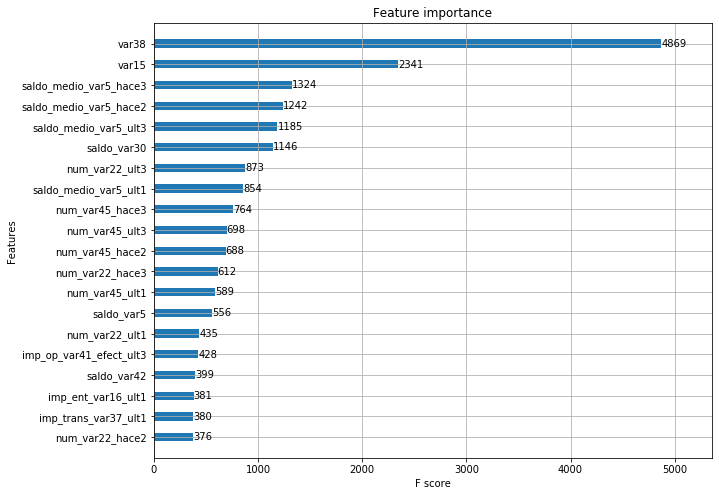

In [9]:
from xgboost import plot_importance 
import matplotlib.pyplot as plt 
%matplotlib inline 

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

In [10]:
## + [ LightGBM model ] ============
from lightgbm import LGBMClassifier 
lgbm_clf = LGBMClassifier(n_estimatiors = 500)
evals = [(X_test, y_test)]

lgbm_clf.fit(X_train,
             y_train,
             early_stopping_rounds = 100, 
             eval_metric = "auc",
             eval_set = evals,
             verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average = "macro")
print("ROC-AUC : {0:.4f}".format(lgbm_roc_score)) # ROC-AUC : 0.8323

[LightGBM] [Warning] Unknown parameter: n_estimatiors
[1]	valid_0's auc: 0.815161	valid_0's binary_logloss: 0.158865
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818025	valid_0's binary_logloss: 0.154078
[3]	valid_0's auc: 0.821576	valid_0's binary_logloss: 0.150594
[4]	valid_0's auc: 0.822268	valid_0's binary_logloss: 0.148245
[5]	valid_0's auc: 0.823684	valid_0's binary_logloss: 0.146138
[6]	valid_0's auc: 0.826599	valid_0's binary_logloss: 0.144614
[7]	valid_0's auc: 0.827263	valid_0's binary_logloss: 0.143386
[8]	valid_0's auc: 0.827932	valid_0's binary_logloss: 0.14232
[9]	valid_0's auc: 0.827839	valid_0's binary_logloss: 0.141488
[10]	valid_0's auc: 0.828017	valid_0's binary_logloss: 0.140699
[11]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.139996
[12]	valid_0's auc: 0.828497	valid_0's binary_logloss: 0.13941
[13]	valid_0's auc: 0.830199	valid_0's binary_logloss: 0.138913
[14]	valid_0's auc: 0.830349	valid_0's binary_logloss: 0.138461

In [11]:
## + [ LightGBM model optimization parameters ] ============
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators = 200)
params = {"num_leaves" : [32, 64],
          "max_depth" : [128, 160],
          "min_child_samples" : [60, 100],
          "subsample" : [0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv = 3)
gridcv.fit(X_train, 
           y_train, 
           early_stopping_rounds = 30,
           eval_metric = "auc",
           eval_set = [(X_train, y_train), (X_test, y_test)])

lgbm_roc_socre = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = "macro")
print("ROC-AUC : {0:.4f}".format(lgbm_roc_score)) # ROC-AUC : 0.8323

[1]	valid_0's auc: 0.82723	valid_0's binary_logloss: 0.15758	valid_1's auc: 0.816245	valid_1's binary_logloss: 0.158708
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834266	valid_0's binary_logloss: 0.152192	valid_1's auc: 0.817345	valid_1's binary_logloss: 0.154018
[3]	valid_0's auc: 0.838427	valid_0's binary_logloss: 0.148358	valid_1's auc: 0.821218	valid_1's binary_logloss: 0.150605
[4]	valid_0's auc: 0.840846	valid_0's binary_logloss: 0.145387	valid_1's auc: 0.822982	valid_1's binary_logloss: 0.148119
[5]	valid_0's auc: 0.844678	valid_0's binary_logloss: 0.142921	valid_1's auc: 0.823848	valid_1's binary_logloss: 0.146167
[6]	valid_0's auc: 0.846411	valid_0's binary_logloss: 0.140907	valid_1's auc: 0.825444	valid_1's binary_logloss: 0.144406
[7]	valid_0's auc: 0.848827	valid_0's binary_logloss: 0.139182	valid_1's auc: 0.824846	valid_1's binary_logloss: 0.14307
[8]	valid_0's auc: 0.850097	valid_0's binary_logloss: 0.137658	valid_1's auc: 0.824677	v

[13]	valid_0's auc: 0.859646	valid_0's binary_logloss: 0.132372	valid_1's auc: 0.827029	valid_1's binary_logloss: 0.139156
[14]	valid_0's auc: 0.860925	valid_0's binary_logloss: 0.131632	valid_1's auc: 0.826626	valid_1's binary_logloss: 0.13884
[15]	valid_0's auc: 0.86217	valid_0's binary_logloss: 0.130893	valid_1's auc: 0.826808	valid_1's binary_logloss: 0.138587
[16]	valid_0's auc: 0.862997	valid_0's binary_logloss: 0.13029	valid_1's auc: 0.826491	valid_1's binary_logloss: 0.138331
[17]	valid_0's auc: 0.864312	valid_0's binary_logloss: 0.129712	valid_1's auc: 0.827535	valid_1's binary_logloss: 0.138016
[18]	valid_0's auc: 0.865674	valid_0's binary_logloss: 0.129187	valid_1's auc: 0.827993	valid_1's binary_logloss: 0.137764
[19]	valid_0's auc: 0.866176	valid_0's binary_logloss: 0.1287	valid_1's auc: 0.827233	valid_1's binary_logloss: 0.137768
[20]	valid_0's auc: 0.867236	valid_0's binary_logloss: 0.128205	valid_1's auc: 0.827292	valid_1's binary_logloss: 0.13763
[21]	valid_0's auc: 0.

[23]	valid_0's auc: 0.869841	valid_0's binary_logloss: 0.127228	valid_1's auc: 0.832187	valid_1's binary_logloss: 0.136344
[24]	valid_0's auc: 0.870755	valid_0's binary_logloss: 0.12686	valid_1's auc: 0.832247	valid_1's binary_logloss: 0.136247
[25]	valid_0's auc: 0.871255	valid_0's binary_logloss: 0.126523	valid_1's auc: 0.832817	valid_1's binary_logloss: 0.136115
[26]	valid_0's auc: 0.872317	valid_0's binary_logloss: 0.12622	valid_1's auc: 0.832544	valid_1's binary_logloss: 0.136083
[27]	valid_0's auc: 0.873566	valid_0's binary_logloss: 0.125858	valid_1's auc: 0.832637	valid_1's binary_logloss: 0.136048
[28]	valid_0's auc: 0.874147	valid_0's binary_logloss: 0.125554	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.136052
[29]	valid_0's auc: 0.874835	valid_0's binary_logloss: 0.125223	valid_1's auc: 0.832147	valid_1's binary_logloss: 0.13606
[30]	valid_0's auc: 0.875431	valid_0's binary_logloss: 0.124943	valid_1's auc: 0.832616	valid_1's binary_logloss: 0.135996
[31]	valid_0's auc:

[24]	valid_0's auc: 0.868151	valid_0's binary_logloss: 0.127103	valid_1's auc: 0.826546	valid_1's binary_logloss: 0.136886
[25]	valid_0's auc: 0.868957	valid_0's binary_logloss: 0.126755	valid_1's auc: 0.826327	valid_1's binary_logloss: 0.136832
[26]	valid_0's auc: 0.869659	valid_0's binary_logloss: 0.126447	valid_1's auc: 0.82687	valid_1's binary_logloss: 0.136765
[27]	valid_0's auc: 0.870395	valid_0's binary_logloss: 0.126137	valid_1's auc: 0.826235	valid_1's binary_logloss: 0.136805
[28]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125858	valid_1's auc: 0.826425	valid_1's binary_logloss: 0.136794
[29]	valid_0's auc: 0.871856	valid_0's binary_logloss: 0.125538	valid_1's auc: 0.827509	valid_1's binary_logloss: 0.136696
[30]	valid_0's auc: 0.872572	valid_0's binary_logloss: 0.125295	valid_1's auc: 0.827224	valid_1's binary_logloss: 0.136735
[31]	valid_0's auc: 0.873553	valid_0's binary_logloss: 0.125028	valid_1's auc: 0.827422	valid_1's binary_logloss: 0.136762
[32]	valid_0's au

[33]	valid_0's auc: 0.876712	valid_0's binary_logloss: 0.123871	valid_1's auc: 0.828439	valid_1's binary_logloss: 0.137272
[34]	valid_0's auc: 0.87759	valid_0's binary_logloss: 0.1236	valid_1's auc: 0.828685	valid_1's binary_logloss: 0.13726
[35]	valid_0's auc: 0.87795	valid_0's binary_logloss: 0.123427	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.137235
[36]	valid_0's auc: 0.878551	valid_0's binary_logloss: 0.123169	valid_1's auc: 0.828797	valid_1's binary_logloss: 0.137282
[37]	valid_0's auc: 0.879373	valid_0's binary_logloss: 0.122863	valid_1's auc: 0.828519	valid_1's binary_logloss: 0.137336
[38]	valid_0's auc: 0.879842	valid_0's binary_logloss: 0.122622	valid_1's auc: 0.82829	valid_1's binary_logloss: 0.137385
[39]	valid_0's auc: 0.880551	valid_0's binary_logloss: 0.122364	valid_1's auc: 0.82814	valid_1's binary_logloss: 0.137424
[40]	valid_0's auc: 0.881629	valid_0's binary_logloss: 0.122058	valid_1's auc: 0.828785	valid_1's binary_logloss: 0.137332
[41]	valid_0's auc: 0.8

[35]	valid_0's auc: 0.879226	valid_0's binary_logloss: 0.123647	valid_1's auc: 0.832784	valid_1's binary_logloss: 0.135916
[36]	valid_0's auc: 0.879679	valid_0's binary_logloss: 0.123433	valid_1's auc: 0.832812	valid_1's binary_logloss: 0.135906
[37]	valid_0's auc: 0.880345	valid_0's binary_logloss: 0.123178	valid_1's auc: 0.83329	valid_1's binary_logloss: 0.13583
[38]	valid_0's auc: 0.881018	valid_0's binary_logloss: 0.122939	valid_1's auc: 0.833297	valid_1's binary_logloss: 0.13583
[39]	valid_0's auc: 0.881475	valid_0's binary_logloss: 0.122721	valid_1's auc: 0.833708	valid_1's binary_logloss: 0.135742
[40]	valid_0's auc: 0.881864	valid_0's binary_logloss: 0.122505	valid_1's auc: 0.833365	valid_1's binary_logloss: 0.135818
[41]	valid_0's auc: 0.882493	valid_0's binary_logloss: 0.122289	valid_1's auc: 0.833173	valid_1's binary_logloss: 0.135858
[42]	valid_0's auc: 0.883289	valid_0's binary_logloss: 0.122052	valid_1's auc: 0.83336	valid_1's binary_logloss: 0.135825
[43]	valid_0's auc: 

[34]	valid_0's auc: 0.892258	valid_0's binary_logloss: 0.117822	valid_1's auc: 0.826219	valid_1's binary_logloss: 0.137284
[35]	valid_0's auc: 0.893732	valid_0's binary_logloss: 0.117429	valid_1's auc: 0.826569	valid_1's binary_logloss: 0.137283
[36]	valid_0's auc: 0.894866	valid_0's binary_logloss: 0.117044	valid_1's auc: 0.826911	valid_1's binary_logloss: 0.137309
[37]	valid_0's auc: 0.895907	valid_0's binary_logloss: 0.116713	valid_1's auc: 0.826705	valid_1's binary_logloss: 0.137394
[38]	valid_0's auc: 0.896439	valid_0's binary_logloss: 0.116377	valid_1's auc: 0.827046	valid_1's binary_logloss: 0.137385
[39]	valid_0's auc: 0.897036	valid_0's binary_logloss: 0.116017	valid_1's auc: 0.826808	valid_1's binary_logloss: 0.1375
[40]	valid_0's auc: 0.897564	valid_0's binary_logloss: 0.115759	valid_1's auc: 0.826514	valid_1's binary_logloss: 0.137662
[41]	valid_0's auc: 0.897898	valid_0's binary_logloss: 0.115516	valid_1's auc: 0.826061	valid_1's binary_logloss: 0.137858
[42]	valid_0's auc

[42]	valid_0's auc: 0.899499	valid_0's binary_logloss: 0.11487	valid_1's auc: 0.824039	valid_1's binary_logloss: 0.139074
[43]	valid_0's auc: 0.899889	valid_0's binary_logloss: 0.114583	valid_1's auc: 0.823279	valid_1's binary_logloss: 0.139256
[44]	valid_0's auc: 0.900306	valid_0's binary_logloss: 0.114348	valid_1's auc: 0.823549	valid_1's binary_logloss: 0.139244
[45]	valid_0's auc: 0.900612	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.823166	valid_1's binary_logloss: 0.139396
[46]	valid_0's auc: 0.901306	valid_0's binary_logloss: 0.113711	valid_1's auc: 0.82348	valid_1's binary_logloss: 0.139359
[47]	valid_0's auc: 0.901831	valid_0's binary_logloss: 0.113431	valid_1's auc: 0.823354	valid_1's binary_logloss: 0.139438
[48]	valid_0's auc: 0.902372	valid_0's binary_logloss: 0.113118	valid_1's auc: 0.823401	valid_1's binary_logloss: 0.139449
[49]	valid_0's auc: 0.902654	valid_0's binary_logloss: 0.112873	valid_1's auc: 0.823289	valid_1's binary_logloss: 0.139549
[50]	valid_0's auc

[49]	valid_0's auc: 0.902842	valid_0's binary_logloss: 0.112883	valid_1's auc: 0.831069	valid_1's binary_logloss: 0.136783
[50]	valid_0's auc: 0.903162	valid_0's binary_logloss: 0.112624	valid_1's auc: 0.831351	valid_1's binary_logloss: 0.136757
[51]	valid_0's auc: 0.903466	valid_0's binary_logloss: 0.112378	valid_1's auc: 0.830721	valid_1's binary_logloss: 0.13696
[52]	valid_0's auc: 0.903911	valid_0's binary_logloss: 0.112109	valid_1's auc: 0.830778	valid_1's binary_logloss: 0.136986
[53]	valid_0's auc: 0.904543	valid_0's binary_logloss: 0.111912	valid_1's auc: 0.830741	valid_1's binary_logloss: 0.13703
[54]	valid_0's auc: 0.904737	valid_0's binary_logloss: 0.111726	valid_1's auc: 0.830227	valid_1's binary_logloss: 0.137169
[55]	valid_0's auc: 0.905062	valid_0's binary_logloss: 0.111497	valid_1's auc: 0.829941	valid_1's binary_logloss: 0.137267
[56]	valid_0's auc: 0.905708	valid_0's binary_logloss: 0.111184	valid_1's auc: 0.829841	valid_1's binary_logloss: 0.137388
[57]	valid_0's auc

[57]	valid_0's auc: 0.904883	valid_0's binary_logloss: 0.111581	valid_1's auc: 0.822967	valid_1's binary_logloss: 0.139264
[58]	valid_0's auc: 0.905651	valid_0's binary_logloss: 0.11132	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.139332
[59]	valid_0's auc: 0.90598	valid_0's binary_logloss: 0.11117	valid_1's auc: 0.823084	valid_1's binary_logloss: 0.139396
Early stopping, best iteration is:
[29]	valid_0's auc: 0.888687	valid_0's binary_logloss: 0.119654	valid_1's auc: 0.827638	valid_1's binary_logloss: 0.136774
[1]	valid_0's auc: 0.834123	valid_0's binary_logloss: 0.156612	valid_1's auc: 0.80112	valid_1's binary_logloss: 0.158648
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843794	valid_0's binary_logloss: 0.150938	valid_1's auc: 0.815232	valid_1's binary_logloss: 0.153995
[3]	valid_0's auc: 0.847113	valid_0's binary_logloss: 0.146791	valid_1's auc: 0.819649	valid_1's binary_logloss: 0.150765
[4]	valid_0's auc: 0.850961	valid_0's binary_loglo

[10]	valid_0's auc: 0.865257	valid_0's binary_logloss: 0.13239	valid_1's auc: 0.830778	valid_1's binary_logloss: 0.140081
[11]	valid_0's auc: 0.867308	valid_0's binary_logloss: 0.131183	valid_1's auc: 0.82914	valid_1's binary_logloss: 0.139684
[12]	valid_0's auc: 0.868905	valid_0's binary_logloss: 0.130046	valid_1's auc: 0.829157	valid_1's binary_logloss: 0.139136
[13]	valid_0's auc: 0.871252	valid_0's binary_logloss: 0.129022	valid_1's auc: 0.82892	valid_1's binary_logloss: 0.138739
[14]	valid_0's auc: 0.872512	valid_0's binary_logloss: 0.128156	valid_1's auc: 0.827846	valid_1's binary_logloss: 0.138471
[15]	valid_0's auc: 0.873914	valid_0's binary_logloss: 0.12735	valid_1's auc: 0.82836	valid_1's binary_logloss: 0.138144
[16]	valid_0's auc: 0.875589	valid_0's binary_logloss: 0.126559	valid_1's auc: 0.828793	valid_1's binary_logloss: 0.137804
[17]	valid_0's auc: 0.87711	valid_0's binary_logloss: 0.125834	valid_1's auc: 0.828391	valid_1's binary_logloss: 0.137548
[18]	valid_0's auc: 0.

[23]	valid_0's auc: 0.866156	valid_0's binary_logloss: 0.128062	valid_1's auc: 0.827308	valid_1's binary_logloss: 0.136553
[24]	valid_0's auc: 0.86691	valid_0's binary_logloss: 0.127733	valid_1's auc: 0.827517	valid_1's binary_logloss: 0.136463
[25]	valid_0's auc: 0.867589	valid_0's binary_logloss: 0.127427	valid_1's auc: 0.827163	valid_1's binary_logloss: 0.13644
[26]	valid_0's auc: 0.868001	valid_0's binary_logloss: 0.127149	valid_1's auc: 0.827242	valid_1's binary_logloss: 0.136436
[27]	valid_0's auc: 0.868998	valid_0's binary_logloss: 0.126841	valid_1's auc: 0.827592	valid_1's binary_logloss: 0.136365
[28]	valid_0's auc: 0.869734	valid_0's binary_logloss: 0.126519	valid_1's auc: 0.827393	valid_1's binary_logloss: 0.136412
[29]	valid_0's auc: 0.870702	valid_0's binary_logloss: 0.126218	valid_1's auc: 0.827677	valid_1's binary_logloss: 0.136396
[30]	valid_0's auc: 0.871307	valid_0's binary_logloss: 0.125989	valid_1's auc: 0.827465	valid_1's binary_logloss: 0.136442
[31]	valid_0's auc

[35]	valid_0's auc: 0.875666	valid_0's binary_logloss: 0.124413	valid_1's auc: 0.828285	valid_1's binary_logloss: 0.13709
[36]	valid_0's auc: 0.876528	valid_0's binary_logloss: 0.124164	valid_1's auc: 0.828412	valid_1's binary_logloss: 0.137086
[37]	valid_0's auc: 0.877056	valid_0's binary_logloss: 0.123918	valid_1's auc: 0.828107	valid_1's binary_logloss: 0.137163
[38]	valid_0's auc: 0.877618	valid_0's binary_logloss: 0.123716	valid_1's auc: 0.827966	valid_1's binary_logloss: 0.137199
[39]	valid_0's auc: 0.878327	valid_0's binary_logloss: 0.123491	valid_1's auc: 0.828035	valid_1's binary_logloss: 0.13724
[40]	valid_0's auc: 0.878933	valid_0's binary_logloss: 0.123278	valid_1's auc: 0.828157	valid_1's binary_logloss: 0.137251
[41]	valid_0's auc: 0.879258	valid_0's binary_logloss: 0.123086	valid_1's auc: 0.827833	valid_1's binary_logloss: 0.137353
[42]	valid_0's auc: 0.879748	valid_0's binary_logloss: 0.122872	valid_1's auc: 0.827284	valid_1's binary_logloss: 0.13751
[43]	valid_0's auc:

[63]	valid_0's auc: 0.888868	valid_0's binary_logloss: 0.119316	valid_1's auc: 0.831206	valid_1's binary_logloss: 0.136572
[64]	valid_0's auc: 0.889371	valid_0's binary_logloss: 0.119103	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.136663
[65]	valid_0's auc: 0.889828	valid_0's binary_logloss: 0.118909	valid_1's auc: 0.830725	valid_1's binary_logloss: 0.136753
Early stopping, best iteration is:
[35]	valid_0's auc: 0.876482	valid_0's binary_logloss: 0.124433	valid_1's auc: 0.833277	valid_1's binary_logloss: 0.135925
[1]	valid_0's auc: 0.82949	valid_0's binary_logloss: 0.157778	valid_1's auc: 0.812891	valid_1's binary_logloss: 0.158916
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.836116	valid_0's binary_logloss: 0.152379	valid_1's auc: 0.816835	valid_1's binary_logloss: 0.154148
[3]	valid_0's auc: 0.838384	valid_0's binary_logloss: 0.148508	valid_1's auc: 0.820831	valid_1's binary_logloss: 0.150629
[4]	valid_0's auc: 0.841116	valid_0's binary_lo

[13]	valid_0's auc: 0.857393	valid_0's binary_logloss: 0.133151	valid_1's auc: 0.82865	valid_1's binary_logloss: 0.138813
[14]	valid_0's auc: 0.858441	valid_0's binary_logloss: 0.132434	valid_1's auc: 0.829992	valid_1's binary_logloss: 0.1383
[15]	valid_0's auc: 0.859338	valid_0's binary_logloss: 0.131808	valid_1's auc: 0.829838	valid_1's binary_logloss: 0.138009
[16]	valid_0's auc: 0.860213	valid_0's binary_logloss: 0.131191	valid_1's auc: 0.830085	valid_1's binary_logloss: 0.137696
[17]	valid_0's auc: 0.861071	valid_0's binary_logloss: 0.130651	valid_1's auc: 0.829687	valid_1's binary_logloss: 0.137524
[18]	valid_0's auc: 0.862409	valid_0's binary_logloss: 0.13014	valid_1's auc: 0.829996	valid_1's binary_logloss: 0.137334
[19]	valid_0's auc: 0.863358	valid_0's binary_logloss: 0.129635	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.137199
[20]	valid_0's auc: 0.864459	valid_0's binary_logloss: 0.129174	valid_1's auc: 0.82946	valid_1's binary_logloss: 0.137158
[21]	valid_0's auc: 0

[43]	valid_0's auc: 0.881908	valid_0's binary_logloss: 0.122551	valid_1's auc: 0.83155	valid_1's binary_logloss: 0.136147
[44]	valid_0's auc: 0.882348	valid_0's binary_logloss: 0.122354	valid_1's auc: 0.831619	valid_1's binary_logloss: 0.136163
[45]	valid_0's auc: 0.882982	valid_0's binary_logloss: 0.122162	valid_1's auc: 0.831664	valid_1's binary_logloss: 0.136204
[46]	valid_0's auc: 0.883546	valid_0's binary_logloss: 0.121954	valid_1's auc: 0.832175	valid_1's binary_logloss: 0.136133
[47]	valid_0's auc: 0.883784	valid_0's binary_logloss: 0.121798	valid_1's auc: 0.832132	valid_1's binary_logloss: 0.136151
[48]	valid_0's auc: 0.88427	valid_0's binary_logloss: 0.12158	valid_1's auc: 0.832179	valid_1's binary_logloss: 0.136137
[49]	valid_0's auc: 0.884664	valid_0's binary_logloss: 0.121408	valid_1's auc: 0.832119	valid_1's binary_logloss: 0.136179
[50]	valid_0's auc: 0.884943	valid_0's binary_logloss: 0.121222	valid_1's auc: 0.832152	valid_1's binary_logloss: 0.136198
[51]	valid_0's auc:

[45]	valid_0's auc: 0.896506	valid_0's binary_logloss: 0.115955	valid_1's auc: 0.82359	valid_1's binary_logloss: 0.138212
[46]	valid_0's auc: 0.897111	valid_0's binary_logloss: 0.115723	valid_1's auc: 0.823624	valid_1's binary_logloss: 0.138323
[47]	valid_0's auc: 0.897406	valid_0's binary_logloss: 0.115478	valid_1's auc: 0.823423	valid_1's binary_logloss: 0.138379
[48]	valid_0's auc: 0.897816	valid_0's binary_logloss: 0.115235	valid_1's auc: 0.822833	valid_1's binary_logloss: 0.138546
[49]	valid_0's auc: 0.898623	valid_0's binary_logloss: 0.114925	valid_1's auc: 0.823008	valid_1's binary_logloss: 0.13858
[50]	valid_0's auc: 0.898912	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.822809	valid_1's binary_logloss: 0.138677
[51]	valid_0's auc: 0.89918	valid_0's binary_logloss: 0.114479	valid_1's auc: 0.822915	valid_1's binary_logloss: 0.138656
[52]	valid_0's auc: 0.899449	valid_0's binary_logloss: 0.114219	valid_1's auc: 0.822396	valid_1's binary_logloss: 0.138833
Early stopping, bes

[17]	valid_0's auc: 0.875339	valid_0's binary_logloss: 0.12691	valid_1's auc: 0.827284	valid_1's binary_logloss: 0.137564
[18]	valid_0's auc: 0.876469	valid_0's binary_logloss: 0.126211	valid_1's auc: 0.827252	valid_1's binary_logloss: 0.137349
[19]	valid_0's auc: 0.877684	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.8271	valid_1's binary_logloss: 0.137176
[20]	valid_0's auc: 0.878666	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.827233	valid_1's binary_logloss: 0.137037
[21]	valid_0's auc: 0.88006	valid_0's binary_logloss: 0.124407	valid_1's auc: 0.828412	valid_1's binary_logloss: 0.136794
[22]	valid_0's auc: 0.880936	valid_0's binary_logloss: 0.123869	valid_1's auc: 0.829498	valid_1's binary_logloss: 0.136573
[23]	valid_0's auc: 0.882129	valid_0's binary_logloss: 0.123335	valid_1's auc: 0.829337	valid_1's binary_logloss: 0.13648
[24]	valid_0's auc: 0.883204	valid_0's binary_logloss: 0.122839	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.136415
[25]	valid_0's auc: 0

[48]	valid_0's auc: 0.897816	valid_0's binary_logloss: 0.115235	valid_1's auc: 0.822833	valid_1's binary_logloss: 0.138546
[49]	valid_0's auc: 0.898623	valid_0's binary_logloss: 0.114925	valid_1's auc: 0.823008	valid_1's binary_logloss: 0.13858
[50]	valid_0's auc: 0.898912	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.822809	valid_1's binary_logloss: 0.138677
[51]	valid_0's auc: 0.89918	valid_0's binary_logloss: 0.114479	valid_1's auc: 0.822915	valid_1's binary_logloss: 0.138656
[52]	valid_0's auc: 0.899449	valid_0's binary_logloss: 0.114219	valid_1's auc: 0.822396	valid_1's binary_logloss: 0.138833
Early stopping, best iteration is:
[22]	valid_0's auc: 0.878842	valid_0's binary_logloss: 0.124385	valid_1's auc: 0.825498	valid_1's binary_logloss: 0.136985
[1]	valid_0's auc: 0.834609	valid_0's binary_logloss: 0.157454	valid_1's auc: 0.811588	valid_1's binary_logloss: 0.158673
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843209	valid_0's binary_l

[17]	valid_0's auc: 0.875339	valid_0's binary_logloss: 0.12691	valid_1's auc: 0.827284	valid_1's binary_logloss: 0.137564
[18]	valid_0's auc: 0.876469	valid_0's binary_logloss: 0.126211	valid_1's auc: 0.827252	valid_1's binary_logloss: 0.137349
[19]	valid_0's auc: 0.877684	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.8271	valid_1's binary_logloss: 0.137176
[20]	valid_0's auc: 0.878666	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.827233	valid_1's binary_logloss: 0.137037
[21]	valid_0's auc: 0.88006	valid_0's binary_logloss: 0.124407	valid_1's auc: 0.828412	valid_1's binary_logloss: 0.136794
[22]	valid_0's auc: 0.880936	valid_0's binary_logloss: 0.123869	valid_1's auc: 0.829498	valid_1's binary_logloss: 0.136573
[23]	valid_0's auc: 0.882129	valid_0's binary_logloss: 0.123335	valid_1's auc: 0.829337	valid_1's binary_logloss: 0.13648
[24]	valid_0's auc: 0.883204	valid_0's binary_logloss: 0.122839	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.136415
[25]	valid_0's auc: 0

[53]	valid_0's auc: 0.886181	valid_0's binary_logloss: 0.120326	valid_1's auc: 0.825574	valid_1's binary_logloss: 0.137626
[54]	valid_0's auc: 0.886478	valid_0's binary_logloss: 0.120164	valid_1's auc: 0.825387	valid_1's binary_logloss: 0.137718
[55]	valid_0's auc: 0.886714	valid_0's binary_logloss: 0.120031	valid_1's auc: 0.825011	valid_1's binary_logloss: 0.137797
[56]	valid_0's auc: 0.887145	valid_0's binary_logloss: 0.119881	valid_1's auc: 0.825421	valid_1's binary_logloss: 0.137798
[57]	valid_0's auc: 0.887482	valid_0's binary_logloss: 0.11972	valid_1's auc: 0.825141	valid_1's binary_logloss: 0.137854
[58]	valid_0's auc: 0.887637	valid_0's binary_logloss: 0.119585	valid_1's auc: 0.825192	valid_1's binary_logloss: 0.137817
[59]	valid_0's auc: 0.888148	valid_0's binary_logloss: 0.119364	valid_1's auc: 0.825276	valid_1's binary_logloss: 0.137784
[60]	valid_0's auc: 0.888414	valid_0's binary_logloss: 0.119215	valid_1's auc: 0.825072	valid_1's binary_logloss: 0.137806
[61]	valid_0's au

[56]	valid_0's auc: 0.889029	valid_0's binary_logloss: 0.118879	valid_1's auc: 0.824485	valid_1's binary_logloss: 0.138326
[57]	valid_0's auc: 0.889262	valid_0's binary_logloss: 0.118745	valid_1's auc: 0.824299	valid_1's binary_logloss: 0.138393
[58]	valid_0's auc: 0.889672	valid_0's binary_logloss: 0.118598	valid_1's auc: 0.82424	valid_1's binary_logloss: 0.138395
[59]	valid_0's auc: 0.890021	valid_0's binary_logloss: 0.118434	valid_1's auc: 0.823984	valid_1's binary_logloss: 0.138474
[60]	valid_0's auc: 0.890327	valid_0's binary_logloss: 0.118273	valid_1's auc: 0.82397	valid_1's binary_logloss: 0.138508
[61]	valid_0's auc: 0.890706	valid_0's binary_logloss: 0.118113	valid_1's auc: 0.82354	valid_1's binary_logloss: 0.138615
[62]	valid_0's auc: 0.890906	valid_0's binary_logloss: 0.117983	valid_1's auc: 0.823108	valid_1's binary_logloss: 0.138738
[63]	valid_0's auc: 0.891067	valid_0's binary_logloss: 0.117863	valid_1's auc: 0.823086	valid_1's binary_logloss: 0.138785
[64]	valid_0's auc:

[67]	valid_0's auc: 0.892511	valid_0's binary_logloss: 0.117751	valid_1's auc: 0.832811	valid_1's binary_logloss: 0.136149
[68]	valid_0's auc: 0.892974	valid_0's binary_logloss: 0.11754	valid_1's auc: 0.832666	valid_1's binary_logloss: 0.136162
[69]	valid_0's auc: 0.893474	valid_0's binary_logloss: 0.11735	valid_1's auc: 0.832475	valid_1's binary_logloss: 0.136202
Early stopping, best iteration is:
[39]	valid_0's auc: 0.881475	valid_0's binary_logloss: 0.122721	valid_1's auc: 0.833708	valid_1's binary_logloss: 0.135742
[1]	valid_0's auc: 0.82723	valid_0's binary_logloss: 0.15758	valid_1's auc: 0.816245	valid_1's binary_logloss: 0.158708
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834266	valid_0's binary_logloss: 0.152192	valid_1's auc: 0.817345	valid_1's binary_logloss: 0.154018
[3]	valid_0's auc: 0.838427	valid_0's binary_logloss: 0.148358	valid_1's auc: 0.821218	valid_1's binary_logloss: 0.150605
[4]	valid_0's auc: 0.840846	valid_0's binary_loglo

[1]	valid_0's auc: 0.825594	valid_0's binary_logloss: 0.157485	valid_1's auc: 0.809492	valid_1's binary_logloss: 0.158777
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833345	valid_0's binary_logloss: 0.152193	valid_1's auc: 0.813135	valid_1's binary_logloss: 0.154172
[3]	valid_0's auc: 0.838407	valid_0's binary_logloss: 0.148319	valid_1's auc: 0.81671	valid_1's binary_logloss: 0.15082
[4]	valid_0's auc: 0.840577	valid_0's binary_logloss: 0.145324	valid_1's auc: 0.818086	valid_1's binary_logloss: 0.148497
[5]	valid_0's auc: 0.843563	valid_0's binary_logloss: 0.142941	valid_1's auc: 0.820115	valid_1's binary_logloss: 0.146523
[6]	valid_0's auc: 0.847312	valid_0's binary_logloss: 0.140878	valid_1's auc: 0.821079	valid_1's binary_logloss: 0.144901
[7]	valid_0's auc: 0.849882	valid_0's binary_logloss: 0.139059	valid_1's auc: 0.823817	valid_1's binary_logloss: 0.143559
[8]	valid_0's auc: 0.851812	valid_0's binary_logloss: 0.137567	valid_1's auc: 0.823834	

[12]	valid_0's auc: 0.856016	valid_0's binary_logloss: 0.133283	valid_1's auc: 0.83044	valid_1's binary_logloss: 0.139007
[13]	valid_0's auc: 0.857581	valid_0's binary_logloss: 0.132472	valid_1's auc: 0.83069	valid_1's binary_logloss: 0.138504
[14]	valid_0's auc: 0.858858	valid_0's binary_logloss: 0.131772	valid_1's auc: 0.83019	valid_1's binary_logloss: 0.138123
[15]	valid_0's auc: 0.860774	valid_0's binary_logloss: 0.131098	valid_1's auc: 0.830916	valid_1's binary_logloss: 0.13779
[16]	valid_0's auc: 0.861909	valid_0's binary_logloss: 0.130526	valid_1's auc: 0.831541	valid_1's binary_logloss: 0.137443
[17]	valid_0's auc: 0.863905	valid_0's binary_logloss: 0.129924	valid_1's auc: 0.831295	valid_1's binary_logloss: 0.137188
[18]	valid_0's auc: 0.86565	valid_0's binary_logloss: 0.129398	valid_1's auc: 0.831301	valid_1's binary_logloss: 0.136979
[19]	valid_0's auc: 0.866324	valid_0's binary_logloss: 0.128851	valid_1's auc: 0.831107	valid_1's binary_logloss: 0.136782
[20]	valid_0's auc: 0

[9]	valid_0's auc: 0.863084	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.825229	valid_1's binary_logloss: 0.14079
[10]	valid_0's auc: 0.864263	valid_0's binary_logloss: 0.132309	valid_1's auc: 0.825185	valid_1's binary_logloss: 0.140094
[11]	valid_0's auc: 0.866707	valid_0's binary_logloss: 0.13122	valid_1's auc: 0.826449	valid_1's binary_logloss: 0.1394
[12]	valid_0's auc: 0.86769	valid_0's binary_logloss: 0.130243	valid_1's auc: 0.825951	valid_1's binary_logloss: 0.138935
[13]	valid_0's auc: 0.869452	valid_0's binary_logloss: 0.129303	valid_1's auc: 0.825921	valid_1's binary_logloss: 0.138523
[14]	valid_0's auc: 0.871284	valid_0's binary_logloss: 0.128367	valid_1's auc: 0.825776	valid_1's binary_logloss: 0.138214
[15]	valid_0's auc: 0.872893	valid_0's binary_logloss: 0.127531	valid_1's auc: 0.827222	valid_1's binary_logloss: 0.137786
[16]	valid_0's auc: 0.874399	valid_0's binary_logloss: 0.126719	valid_1's auc: 0.827329	valid_1's binary_logloss: 0.137526
[17]	valid_0's auc: 0.

[17]	valid_0's auc: 0.877102	valid_0's binary_logloss: 0.12557	valid_1's auc: 0.825974	valid_1's binary_logloss: 0.138609
[18]	valid_0's auc: 0.878648	valid_0's binary_logloss: 0.124823	valid_1's auc: 0.825948	valid_1's binary_logloss: 0.138408
[19]	valid_0's auc: 0.879576	valid_0's binary_logloss: 0.124193	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.138332
[20]	valid_0's auc: 0.880754	valid_0's binary_logloss: 0.123623	valid_1's auc: 0.826045	valid_1's binary_logloss: 0.138203
[21]	valid_0's auc: 0.88196	valid_0's binary_logloss: 0.123092	valid_1's auc: 0.826065	valid_1's binary_logloss: 0.138108
[22]	valid_0's auc: 0.88324	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.826381	valid_1's binary_logloss: 0.138062
[23]	valid_0's auc: 0.884223	valid_0's binary_logloss: 0.12196	valid_1's auc: 0.826587	valid_1's binary_logloss: 0.13807
[24]	valid_0's auc: 0.885382	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.826343	valid_1's binary_logloss: 0.138093
[25]	valid_0's auc: 0

[26]	valid_0's auc: 0.887464	valid_0's binary_logloss: 0.120748	valid_1's auc: 0.831436	valid_1's binary_logloss: 0.136351
[27]	valid_0's auc: 0.888449	valid_0's binary_logloss: 0.120274	valid_1's auc: 0.830765	valid_1's binary_logloss: 0.136396
[28]	valid_0's auc: 0.889718	valid_0's binary_logloss: 0.11982	valid_1's auc: 0.830348	valid_1's binary_logloss: 0.136441
[29]	valid_0's auc: 0.890649	valid_0's binary_logloss: 0.119414	valid_1's auc: 0.830402	valid_1's binary_logloss: 0.136416
[30]	valid_0's auc: 0.891861	valid_0's binary_logloss: 0.118959	valid_1's auc: 0.830548	valid_1's binary_logloss: 0.136387
[31]	valid_0's auc: 0.892672	valid_0's binary_logloss: 0.11857	valid_1's auc: 0.830939	valid_1's binary_logloss: 0.136317
[32]	valid_0's auc: 0.893285	valid_0's binary_logloss: 0.118197	valid_1's auc: 0.831127	valid_1's binary_logloss: 0.136265
[33]	valid_0's auc: 0.893908	valid_0's binary_logloss: 0.117829	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.136273
[34]	valid_0's auc:

[32]	valid_0's auc: 0.891271	valid_0's binary_logloss: 0.118508	valid_1's auc: 0.826942	valid_1's binary_logloss: 0.136999
[33]	valid_0's auc: 0.891782	valid_0's binary_logloss: 0.118162	valid_1's auc: 0.826547	valid_1's binary_logloss: 0.137137
[34]	valid_0's auc: 0.892258	valid_0's binary_logloss: 0.117822	valid_1's auc: 0.826219	valid_1's binary_logloss: 0.137284
[35]	valid_0's auc: 0.893732	valid_0's binary_logloss: 0.117429	valid_1's auc: 0.826569	valid_1's binary_logloss: 0.137283
[36]	valid_0's auc: 0.894866	valid_0's binary_logloss: 0.117044	valid_1's auc: 0.826911	valid_1's binary_logloss: 0.137309
[37]	valid_0's auc: 0.895907	valid_0's binary_logloss: 0.116713	valid_1's auc: 0.826705	valid_1's binary_logloss: 0.137394
[38]	valid_0's auc: 0.896439	valid_0's binary_logloss: 0.116377	valid_1's auc: 0.827046	valid_1's binary_logloss: 0.137385
[39]	valid_0's auc: 0.897036	valid_0's binary_logloss: 0.116017	valid_1's auc: 0.826808	valid_1's binary_logloss: 0.1375
[40]	valid_0's auc

[40]	valid_0's auc: 0.898182	valid_0's binary_logloss: 0.115466	valid_1's auc: 0.824131	valid_1's binary_logloss: 0.139026
[41]	valid_0's auc: 0.898817	valid_0's binary_logloss: 0.115192	valid_1's auc: 0.823685	valid_1's binary_logloss: 0.139133
[42]	valid_0's auc: 0.899499	valid_0's binary_logloss: 0.11487	valid_1's auc: 0.824039	valid_1's binary_logloss: 0.139074
[43]	valid_0's auc: 0.899889	valid_0's binary_logloss: 0.114583	valid_1's auc: 0.823279	valid_1's binary_logloss: 0.139256
[44]	valid_0's auc: 0.900306	valid_0's binary_logloss: 0.114348	valid_1's auc: 0.823549	valid_1's binary_logloss: 0.139244
[45]	valid_0's auc: 0.900612	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.823166	valid_1's binary_logloss: 0.139396
[46]	valid_0's auc: 0.901306	valid_0's binary_logloss: 0.113711	valid_1's auc: 0.82348	valid_1's binary_logloss: 0.139359
[47]	valid_0's auc: 0.901831	valid_0's binary_logloss: 0.113431	valid_1's auc: 0.823354	valid_1's binary_logloss: 0.139438
[48]	valid_0's auc

[47]	valid_0's auc: 0.901971	valid_0's binary_logloss: 0.113405	valid_1's auc: 0.831449	valid_1's binary_logloss: 0.136687
[48]	valid_0's auc: 0.902608	valid_0's binary_logloss: 0.113105	valid_1's auc: 0.831023	valid_1's binary_logloss: 0.136786
[49]	valid_0's auc: 0.902842	valid_0's binary_logloss: 0.112883	valid_1's auc: 0.831069	valid_1's binary_logloss: 0.136783
[50]	valid_0's auc: 0.903162	valid_0's binary_logloss: 0.112624	valid_1's auc: 0.831351	valid_1's binary_logloss: 0.136757
[51]	valid_0's auc: 0.903466	valid_0's binary_logloss: 0.112378	valid_1's auc: 0.830721	valid_1's binary_logloss: 0.13696
[52]	valid_0's auc: 0.903911	valid_0's binary_logloss: 0.112109	valid_1's auc: 0.830778	valid_1's binary_logloss: 0.136986
[53]	valid_0's auc: 0.904543	valid_0's binary_logloss: 0.111912	valid_1's auc: 0.830741	valid_1's binary_logloss: 0.13703
[54]	valid_0's auc: 0.904737	valid_0's binary_logloss: 0.111726	valid_1's auc: 0.830227	valid_1's binary_logloss: 0.137169
[55]	valid_0's auc

[52]	valid_0's auc: 0.883054	valid_0's binary_logloss: 0.121441	valid_1's auc: 0.827874	valid_1's binary_logloss: 0.137014
[53]	valid_0's auc: 0.883519	valid_0's binary_logloss: 0.121284	valid_1's auc: 0.8276	valid_1's binary_logloss: 0.137073
[54]	valid_0's auc: 0.883776	valid_0's binary_logloss: 0.12114	valid_1's auc: 0.827657	valid_1's binary_logloss: 0.137071
[55]	valid_0's auc: 0.884193	valid_0's binary_logloss: 0.120952	valid_1's auc: 0.827521	valid_1's binary_logloss: 0.137141
[56]	valid_0's auc: 0.884465	valid_0's binary_logloss: 0.120809	valid_1's auc: 0.827371	valid_1's binary_logloss: 0.137199
[57]	valid_0's auc: 0.885035	valid_0's binary_logloss: 0.120612	valid_1's auc: 0.827111	valid_1's binary_logloss: 0.137272
Early stopping, best iteration is:
[27]	valid_0's auc: 0.868998	valid_0's binary_logloss: 0.126841	valid_1's auc: 0.827592	valid_1's binary_logloss: 0.136365
[1]	valid_0's auc: 0.824178	valid_0's binary_logloss: 0.158014	valid_1's auc: 0.80999	valid_1's binary_logl

[22]	valid_0's auc: 0.866992	valid_0's binary_logloss: 0.128116	valid_1's auc: 0.832109	valid_1's binary_logloss: 0.136639
[23]	valid_0's auc: 0.86775	valid_0's binary_logloss: 0.127742	valid_1's auc: 0.832749	valid_1's binary_logloss: 0.136467
[24]	valid_0's auc: 0.868931	valid_0's binary_logloss: 0.127376	valid_1's auc: 0.832604	valid_1's binary_logloss: 0.136427
[25]	valid_0's auc: 0.869534	valid_0's binary_logloss: 0.127052	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.136368
[26]	valid_0's auc: 0.870737	valid_0's binary_logloss: 0.126732	valid_1's auc: 0.832564	valid_1's binary_logloss: 0.13632
[27]	valid_0's auc: 0.871688	valid_0's binary_logloss: 0.126407	valid_1's auc: 0.832623	valid_1's binary_logloss: 0.136263
[28]	valid_0's auc: 0.872639	valid_0's binary_logloss: 0.12608	valid_1's auc: 0.833196	valid_1's binary_logloss: 0.13615
[29]	valid_0's auc: 0.873173	valid_0's binary_logloss: 0.125822	valid_1's auc: 0.832991	valid_1's binary_logloss: 0.13613
[30]	valid_0's auc: 0

[23]	valid_0's auc: 0.866156	valid_0's binary_logloss: 0.128062	valid_1's auc: 0.827308	valid_1's binary_logloss: 0.136553
[24]	valid_0's auc: 0.86691	valid_0's binary_logloss: 0.127733	valid_1's auc: 0.827517	valid_1's binary_logloss: 0.136463
[25]	valid_0's auc: 0.867589	valid_0's binary_logloss: 0.127427	valid_1's auc: 0.827163	valid_1's binary_logloss: 0.13644
[26]	valid_0's auc: 0.868001	valid_0's binary_logloss: 0.127149	valid_1's auc: 0.827242	valid_1's binary_logloss: 0.136436
[27]	valid_0's auc: 0.868998	valid_0's binary_logloss: 0.126841	valid_1's auc: 0.827592	valid_1's binary_logloss: 0.136365
[28]	valid_0's auc: 0.869734	valid_0's binary_logloss: 0.126519	valid_1's auc: 0.827393	valid_1's binary_logloss: 0.136412
[29]	valid_0's auc: 0.870702	valid_0's binary_logloss: 0.126218	valid_1's auc: 0.827677	valid_1's binary_logloss: 0.136396
[30]	valid_0's auc: 0.871307	valid_0's binary_logloss: 0.125989	valid_1's auc: 0.827465	valid_1's binary_logloss: 0.136442
[31]	valid_0's auc

[33]	valid_0's auc: 0.874445	valid_0's binary_logloss: 0.124877	valid_1's auc: 0.827813	valid_1's binary_logloss: 0.137073
[34]	valid_0's auc: 0.875217	valid_0's binary_logloss: 0.124645	valid_1's auc: 0.828226	valid_1's binary_logloss: 0.137038
[35]	valid_0's auc: 0.875666	valid_0's binary_logloss: 0.124413	valid_1's auc: 0.828285	valid_1's binary_logloss: 0.13709
[36]	valid_0's auc: 0.876528	valid_0's binary_logloss: 0.124164	valid_1's auc: 0.828412	valid_1's binary_logloss: 0.137086
[37]	valid_0's auc: 0.877056	valid_0's binary_logloss: 0.123918	valid_1's auc: 0.828107	valid_1's binary_logloss: 0.137163
[38]	valid_0's auc: 0.877618	valid_0's binary_logloss: 0.123716	valid_1's auc: 0.827966	valid_1's binary_logloss: 0.137199
[39]	valid_0's auc: 0.878327	valid_0's binary_logloss: 0.123491	valid_1's auc: 0.828035	valid_1's binary_logloss: 0.13724
[40]	valid_0's auc: 0.878933	valid_0's binary_logloss: 0.123278	valid_1's auc: 0.828157	valid_1's binary_logloss: 0.137251
[41]	valid_0's auc

[53]	valid_0's auc: 0.886149	valid_0's binary_logloss: 0.120719	valid_1's auc: 0.831654	valid_1's binary_logloss: 0.136294
[54]	valid_0's auc: 0.886461	valid_0's binary_logloss: 0.120558	valid_1's auc: 0.831988	valid_1's binary_logloss: 0.136249
[55]	valid_0's auc: 0.886774	valid_0's binary_logloss: 0.120419	valid_1's auc: 0.831996	valid_1's binary_logloss: 0.136272
[56]	valid_0's auc: 0.886959	valid_0's binary_logloss: 0.120324	valid_1's auc: 0.831948	valid_1's binary_logloss: 0.136286
[57]	valid_0's auc: 0.88722	valid_0's binary_logloss: 0.12017	valid_1's auc: 0.831903	valid_1's binary_logloss: 0.136329
[58]	valid_0's auc: 0.887387	valid_0's binary_logloss: 0.120036	valid_1's auc: 0.831582	valid_1's binary_logloss: 0.136418
[59]	valid_0's auc: 0.88788	valid_0's binary_logloss: 0.119914	valid_1's auc: 0.831809	valid_1's binary_logloss: 0.136414
[60]	valid_0's auc: 0.888087	valid_0's binary_logloss: 0.119754	valid_1's auc: 0.831646	valid_1's binary_logloss: 0.13645
[61]	valid_0's auc: 

[1]	valid_0's auc: 0.834609	valid_0's binary_logloss: 0.157454	valid_1's auc: 0.811588	valid_1's binary_logloss: 0.158673
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843209	valid_0's binary_logloss: 0.151693	valid_1's auc: 0.818423	valid_1's binary_logloss: 0.153749
[3]	valid_0's auc: 0.847718	valid_0's binary_logloss: 0.147574	valid_1's auc: 0.821472	valid_1's binary_logloss: 0.150393
[4]	valid_0's auc: 0.850617	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.821986	valid_1's binary_logloss: 0.1479
[5]	valid_0's auc: 0.852711	valid_0's binary_logloss: 0.141706	valid_1's auc: 0.821005	valid_1's binary_logloss: 0.146005
[6]	valid_0's auc: 0.855941	valid_0's binary_logloss: 0.139481	valid_1's auc: 0.822826	valid_1's binary_logloss: 0.144488
[7]	valid_0's auc: 0.860056	valid_0's binary_logloss: 0.137599	valid_1's auc: 0.824982	valid_1's binary_logloss: 0.143215
[8]	valid_0's auc: 0.862036	valid_0's binary_logloss: 0.136008	valid_1's auc: 0.825555	

[24]	valid_0's auc: 0.883204	valid_0's binary_logloss: 0.122839	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.136415
[25]	valid_0's auc: 0.884459	valid_0's binary_logloss: 0.122295	valid_1's auc: 0.829677	valid_1's binary_logloss: 0.13638
[26]	valid_0's auc: 0.885356	valid_0's binary_logloss: 0.121871	valid_1's auc: 0.829509	valid_1's binary_logloss: 0.136384
[27]	valid_0's auc: 0.886005	valid_0's binary_logloss: 0.121444	valid_1's auc: 0.829295	valid_1's binary_logloss: 0.136363
[28]	valid_0's auc: 0.886726	valid_0's binary_logloss: 0.121047	valid_1's auc: 0.828727	valid_1's binary_logloss: 0.136452
[29]	valid_0's auc: 0.887914	valid_0's binary_logloss: 0.12059	valid_1's auc: 0.828691	valid_1's binary_logloss: 0.136526
[30]	valid_0's auc: 0.888825	valid_0's binary_logloss: 0.120168	valid_1's auc: 0.828789	valid_1's binary_logloss: 0.136482
[31]	valid_0's auc: 0.890119	valid_0's binary_logloss: 0.119745	valid_1's auc: 0.829027	valid_1's binary_logloss: 0.136464
[32]	valid_0's auc

[1]	valid_0's auc: 0.834609	valid_0's binary_logloss: 0.157454	valid_1's auc: 0.811588	valid_1's binary_logloss: 0.158673
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843209	valid_0's binary_logloss: 0.151693	valid_1's auc: 0.818423	valid_1's binary_logloss: 0.153749
[3]	valid_0's auc: 0.847718	valid_0's binary_logloss: 0.147574	valid_1's auc: 0.821472	valid_1's binary_logloss: 0.150393
[4]	valid_0's auc: 0.850617	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.821986	valid_1's binary_logloss: 0.1479
[5]	valid_0's auc: 0.852711	valid_0's binary_logloss: 0.141706	valid_1's auc: 0.821005	valid_1's binary_logloss: 0.146005
[6]	valid_0's auc: 0.855941	valid_0's binary_logloss: 0.139481	valid_1's auc: 0.822826	valid_1's binary_logloss: 0.144488
[7]	valid_0's auc: 0.860056	valid_0's binary_logloss: 0.137599	valid_1's auc: 0.824982	valid_1's binary_logloss: 0.143215
[8]	valid_0's auc: 0.862036	valid_0's binary_logloss: 0.136008	valid_1's auc: 0.825555	

[25]	valid_0's auc: 0.884459	valid_0's binary_logloss: 0.122295	valid_1's auc: 0.829677	valid_1's binary_logloss: 0.13638
[26]	valid_0's auc: 0.885356	valid_0's binary_logloss: 0.121871	valid_1's auc: 0.829509	valid_1's binary_logloss: 0.136384
[27]	valid_0's auc: 0.886005	valid_0's binary_logloss: 0.121444	valid_1's auc: 0.829295	valid_1's binary_logloss: 0.136363
[28]	valid_0's auc: 0.886726	valid_0's binary_logloss: 0.121047	valid_1's auc: 0.828727	valid_1's binary_logloss: 0.136452
[29]	valid_0's auc: 0.887914	valid_0's binary_logloss: 0.12059	valid_1's auc: 0.828691	valid_1's binary_logloss: 0.136526
[30]	valid_0's auc: 0.888825	valid_0's binary_logloss: 0.120168	valid_1's auc: 0.828789	valid_1's binary_logloss: 0.136482
[31]	valid_0's auc: 0.890119	valid_0's binary_logloss: 0.119745	valid_1's auc: 0.829027	valid_1's binary_logloss: 0.136464
[32]	valid_0's auc: 0.890915	valid_0's binary_logloss: 0.119312	valid_1's auc: 0.829285	valid_1's binary_logloss: 0.136429
[33]	valid_0's auc

[55]	training's auc: 0.897421	training's binary_logloss: 0.118009	valid_1's auc: 0.833029	valid_1's binary_logloss: 0.13578
[56]	training's auc: 0.897946	training's binary_logloss: 0.117781	valid_1's auc: 0.832475	valid_1's binary_logloss: 0.13589
[57]	training's auc: 0.898463	training's binary_logloss: 0.117607	valid_1's auc: 0.831984	valid_1's binary_logloss: 0.135998
[58]	training's auc: 0.899022	training's binary_logloss: 0.117374	valid_1's auc: 0.831819	valid_1's binary_logloss: 0.13602
[59]	training's auc: 0.899652	training's binary_logloss: 0.117176	valid_1's auc: 0.831615	valid_1's binary_logloss: 0.136084
[60]	training's auc: 0.900132	training's binary_logloss: 0.116972	valid_1's auc: 0.831676	valid_1's binary_logloss: 0.136066
[61]	training's auc: 0.900731	training's binary_logloss: 0.116818	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.136021
[62]	training's auc: 0.901218	training's binary_logloss: 0.116641	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.136061
[63]